In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
plt.style.use('seaborn-darkgrid')
#plt.style.use('dark_background')
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=16)
plt.rc('lines', markersize=16)
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 

 


In [2]:
# Reading in a dataset that reports on Covid Cases across the globe on two times per month
# It lists all the positive tests (num_sequences) for each variant of covid (variant) and sums all positive
# tests for that reporting day "num_sequences_total"

df = pd.read_csv('covid-variants.csv')
df['date'] = pd.to_datetime(df["date"])

df


,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6


In [3]:
# This is   

print(df.isna().sum())
print('Duplicated',df.duplicated().sum())

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64
Duplicated 0


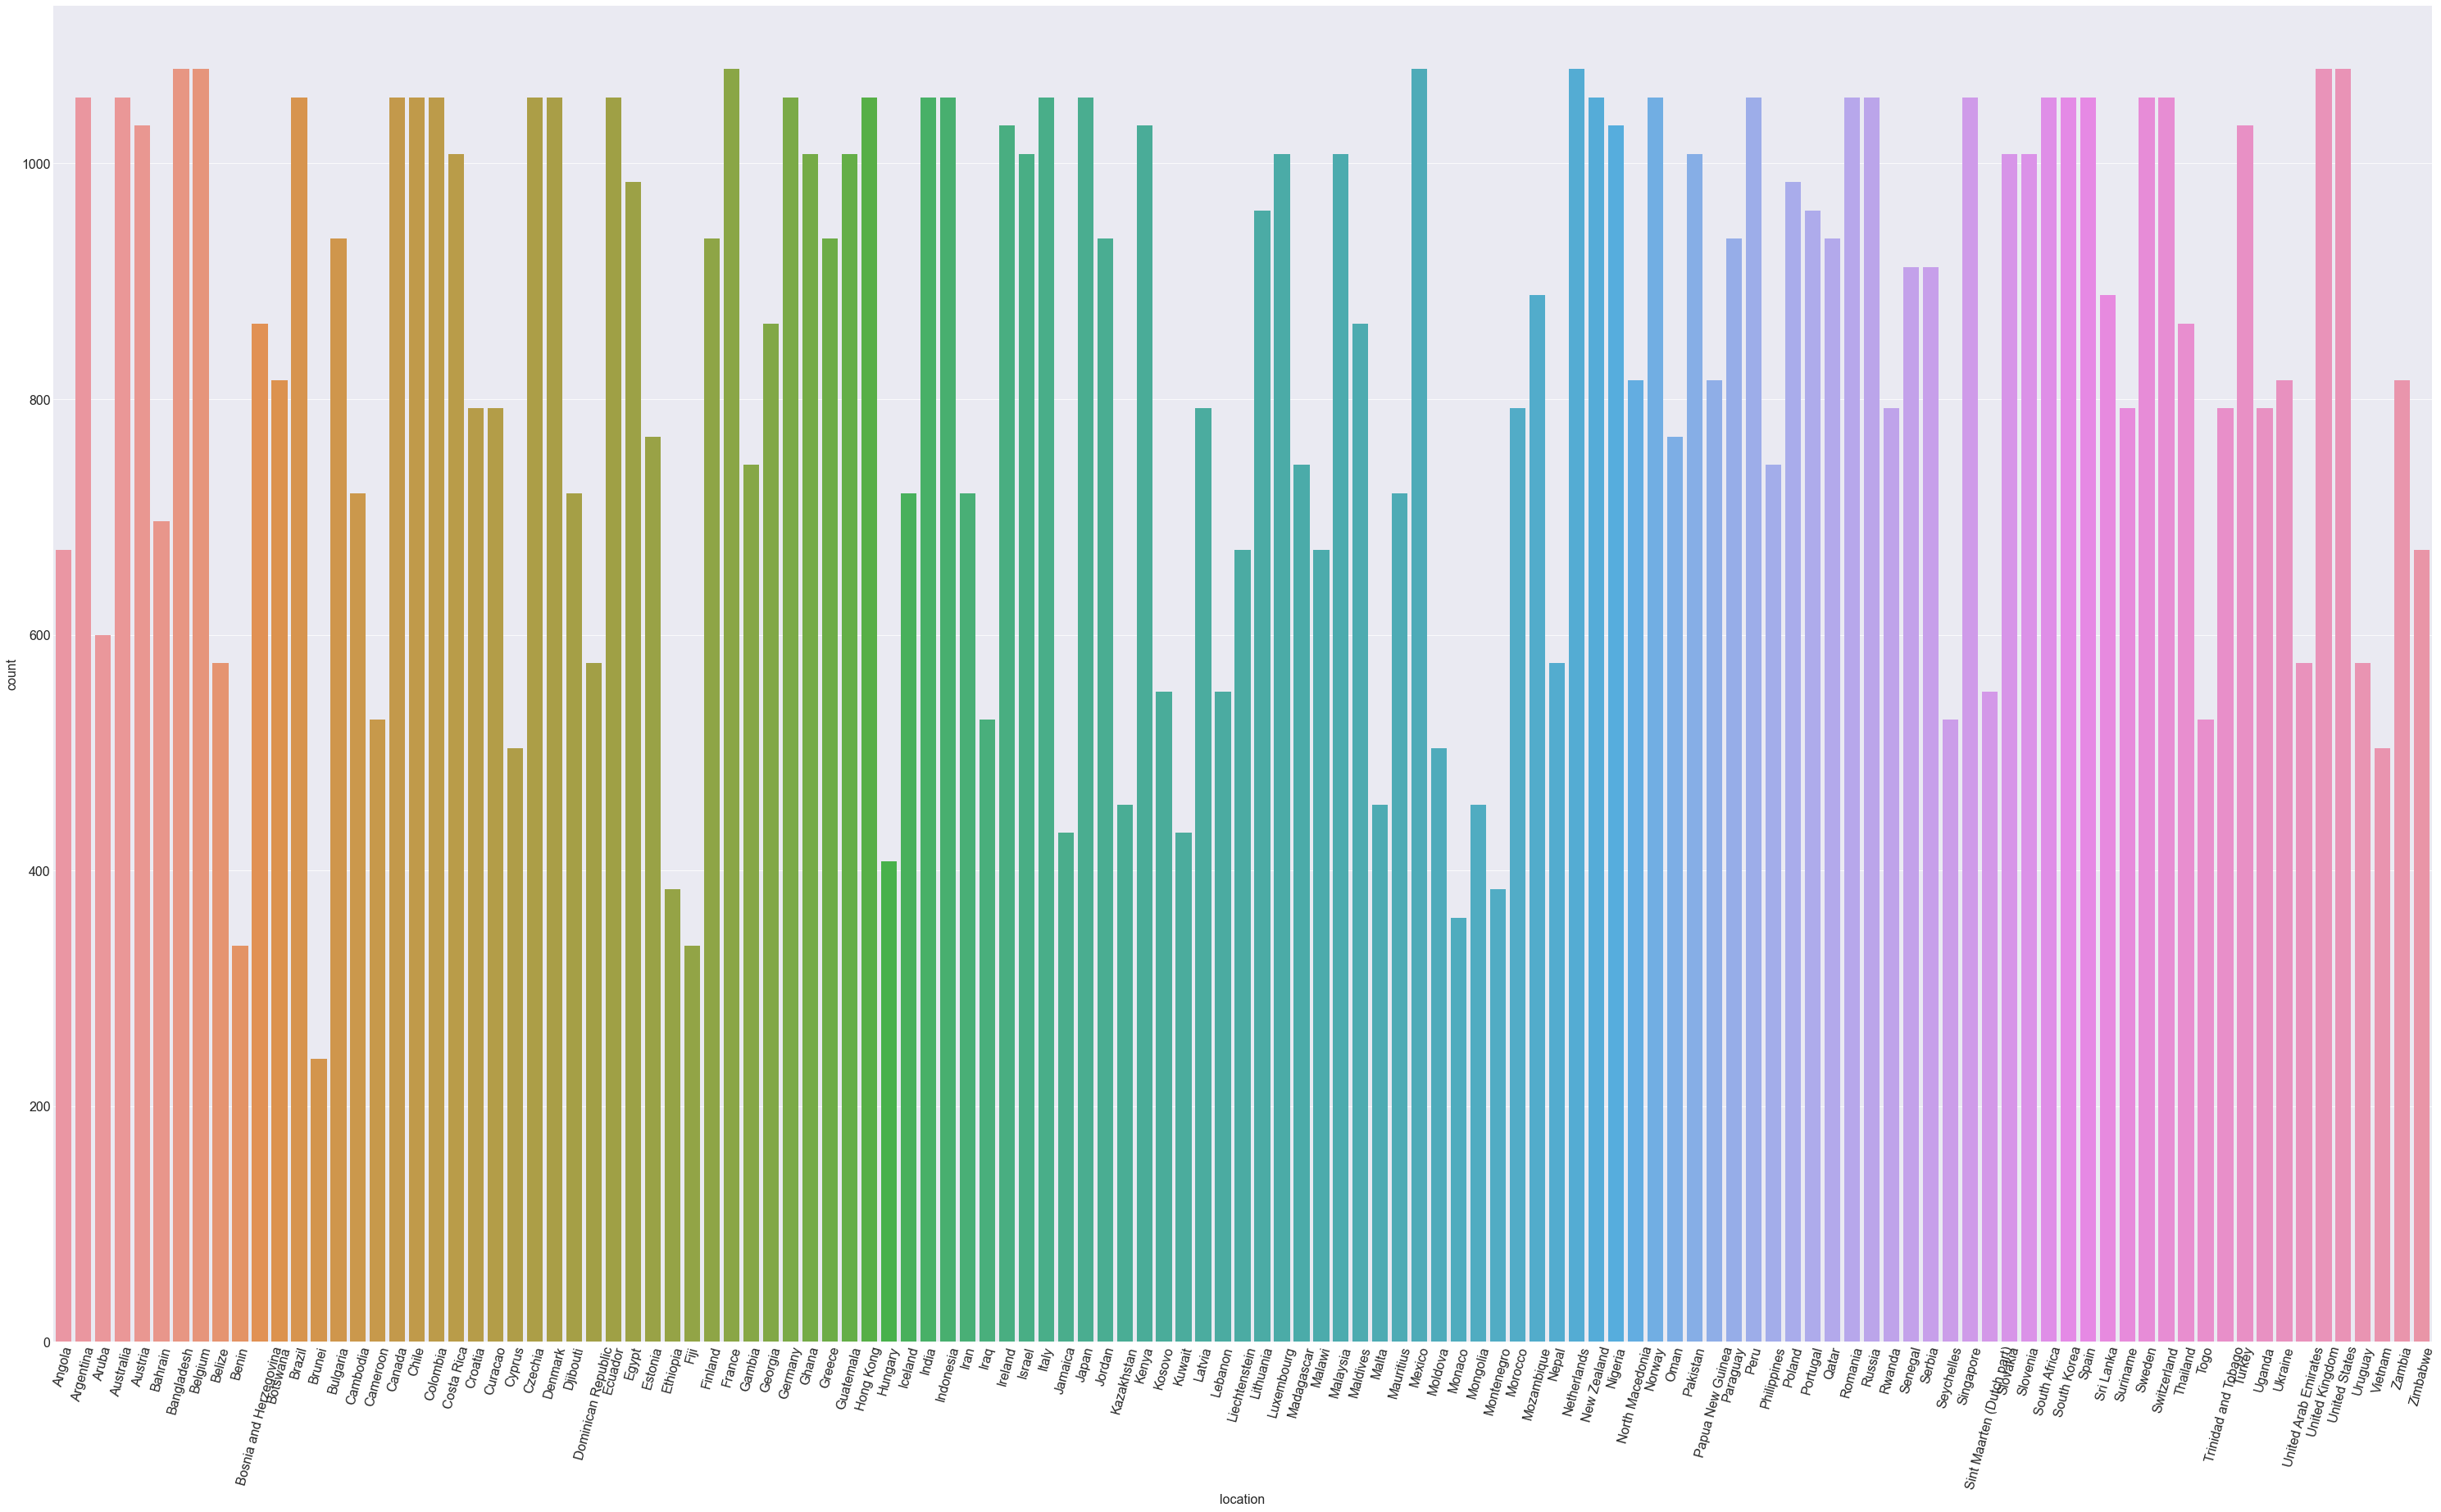

In [4]:
# This code checks to see how many times each country reported. We could not review all countries so wanted to pick 6
# countries from various parts of the globe that had reported for the entire timeframe.
# We use this chart to confirm that the US, Canada (NA), Germany, Switzerland (Eurpoe), India and Japan (Asia) fully 
# reported their Covid cases

df.groupby(['location']).count()
sns.countplot(df['location'])
plt.xticks(rotation=75)
plt.show()

In [5]:
df.set_index("location", inplace=True)
df


,date,variant,num_sequences,perc_sequences,num_sequences_total
location,,,,,
Angola,2020-07-06,Alpha,0,0.0,3
Angola,2020-07-06,B.1.1.277,0,0.0,3
Angola,2020-07-06,B.1.1.302,0,0.0,3
Angola,2020-07-06,B.1.1.519,0,0.0,3
Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...
Zimbabwe,2021-11-01,Omicron,0,0.0,6
Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6


In [31]:
df_all = df.loc[['United States', 'Canada','Germany','Sweden','India','Japan']]


df_us = df.loc[['United States']]
df_can = df.loc[['Canada']]
df_ger = df.loc[['Germany']]
df_swe = df.loc[['Sweden']]
df_ind= df.loc[['India']]
df_japan = df.loc[['Japan']]


In [7]:
df_all

,date,variant,num_sequences,perc_sequences,num_sequences_total
location,,,,,
United States,2020-05-11,Alpha,0,0.00,5804
United States,2020-05-11,B.1.1.277,0,0.00,5804
United States,2020-05-11,B.1.1.302,0,0.00,5804
United States,2020-05-11,B.1.1.519,0,0.00,5804
United States,2020-05-11,B.1.160,0,0.00,5804
...,...,...,...,...,...
Japan,2021-12-27,Omicron,118,77.12,153
Japan,2021-12-27,S:677H.Robin1,0,0.00,153
Japan,2021-12-27,S:677P.Pelican,0,0.00,153


In [8]:
# This code writes the Covid file
df_all.to_csv("Covid6.csv",
                header = True)

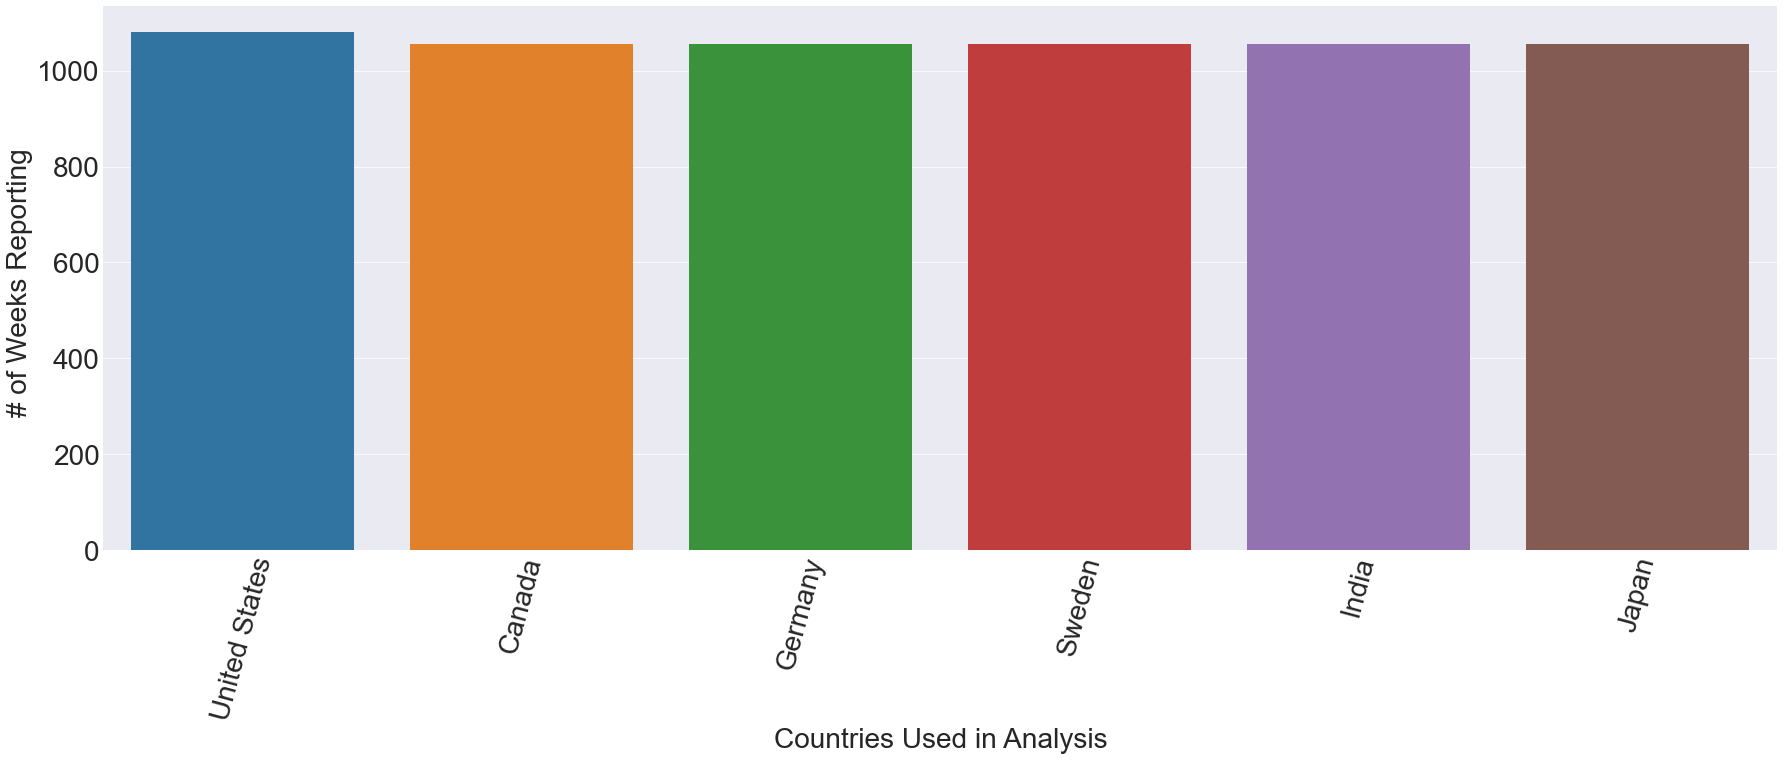

In [33]:
# This does the same check as above and confirms that the countries we picked sent Covid #'s in on a complete and 
# consistant basis

df_all.reset_index(inplace=True)
df_all.groupby('location').count()
sns.countplot(df_all['location'])
plt.xticks(rotation=75)
plt.rc('figure', figsize=(30,10))
plt.rc('font', size=28)
plt.rc('lines', markersize=22)
plt.xlabel('Countries Used in Analysis')
plt.ylabel("# of Weeks Reporting ") 






plt.show()
 
 

In [10]:
# Group Each Country by location and Date and Sum all Covid Variants reported on that Date
# For this analysis we are not considering if masks for against certain variants, we are seeing if they work against 
# all Covid, which includes all variants

sum_all_df = df_all.groupby(['location','date']).agg({'num_sequences_total': 'sum'}) 
sum_us_df = df_us.groupby(['location','date']).agg({'num_sequences_total': 'sum'})
sum_ger_df = df_ger.groupby(['location','date']).agg({'num_sequences_total': 'sum'}) 
sum_can_df = df_can.groupby(['location','date']).agg({'num_sequences_total': 'sum'})
sum_swe_df = df_swe.groupby(['location','date']).agg({'num_sequences_total': 'sum'})
sum_ind_df = df_ind.groupby(['location','date']).agg({'num_sequences_total': 'sum'})
sum_japan_df = df_japan.groupby(['location','date']).agg({'num_sequences_total': 'sum'})

 


Text(0, 0.5, 'Covid Cases Reported ')

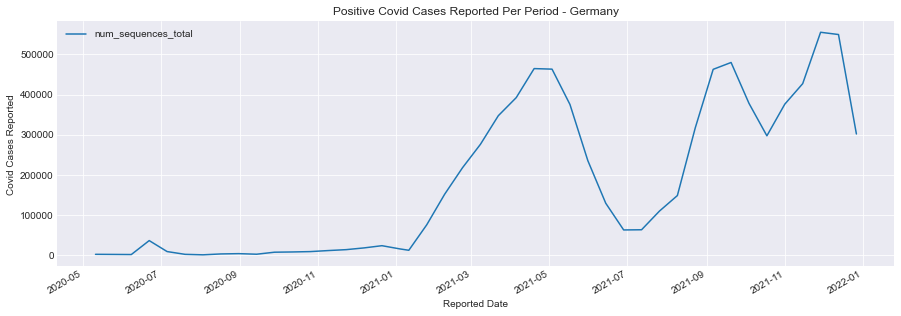

In [36]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_ger_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="line", figsize=(15,5))
plt.title('Positive Covid Cases Reported Per Period - Germany')
plt.xlabel('Reported Date')
plt.ylabel("Covid Cases Reported ") 

Text(0, 0.5, 'Covid Cases Reported ')

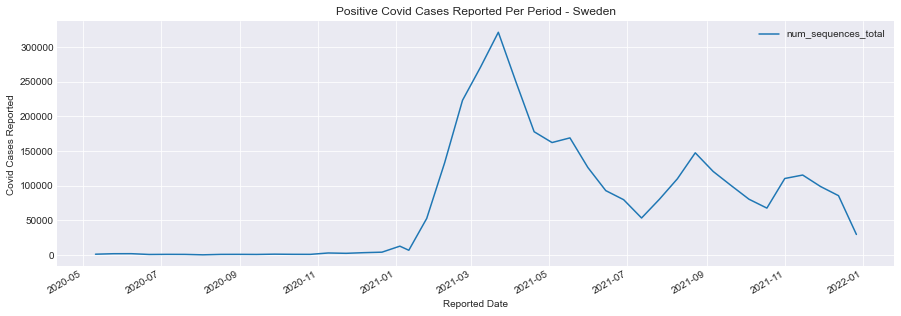

In [35]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_swe_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="line", figsize=(15,5))
plt.title('Positive Covid Cases Reported Per Period - Sweden')
plt.xlabel('Reported Date')
plt.ylabel("Covid Cases Reported ") 

Text(0, 0.5, 'Covid Cases Reported ')

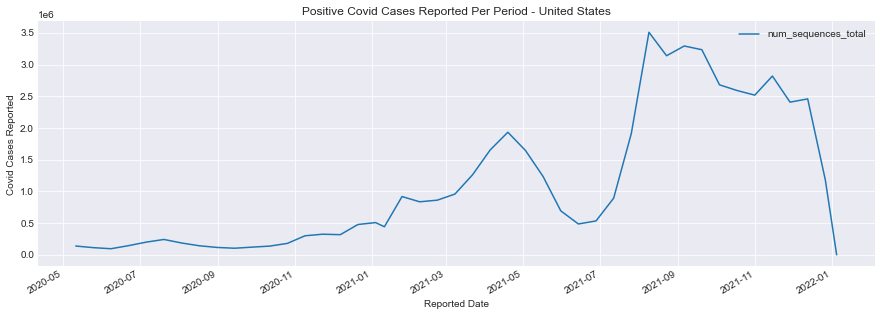

In [39]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_us_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="line", figsize=(15,5))
plt.title('Positive Covid Cases Reported Per Period - United States')
plt.xlabel('Reported Date')
plt.ylabel("Covid Cases Reported ") 

Text(0, 0.5, 'Covid Cases Reported ')

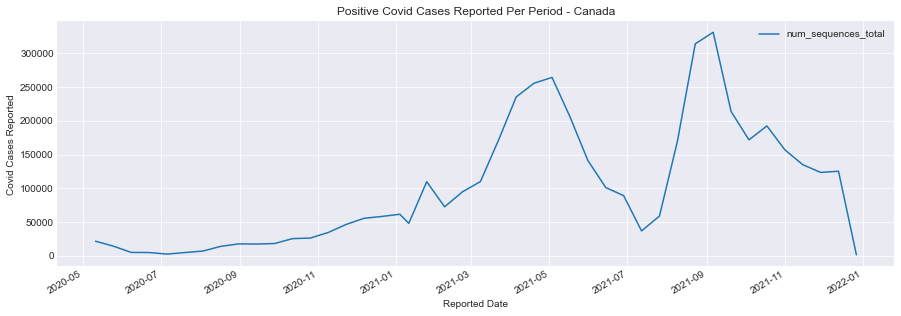

In [37]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_can_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="line", figsize=(15,5))
plt.title('Positive Covid Cases Reported Per Period - Canada')
plt.xlabel('Reported Date')
plt.ylabel("Covid Cases Reported ") 

Text(0, 0.5, 'Covid Cases Reported ')

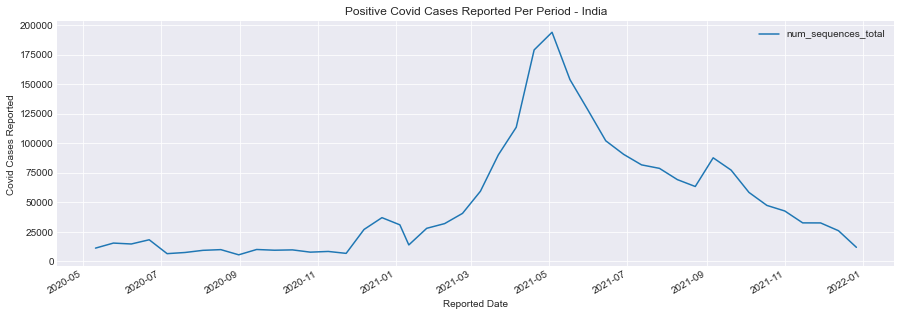

In [38]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_ind_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="line", figsize=(15,5))
plt.title('Positive Covid Cases Reported Per Period - India')
plt.xlabel('Reported Date')
plt.ylabel("Covid Cases Reported ") 

Text(0, 0.5, 'Covid Cases Reported ')

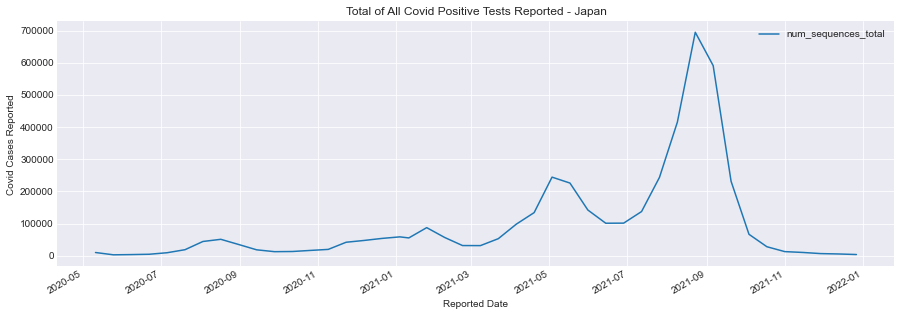

In [17]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_japan_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="line", figsize=(15,5))
plt.title('Total of All Covid Positive Tests Reported - Japan')
plt.xlabel('Reported Date')
plt.ylabel("Covid Cases Reported ") 

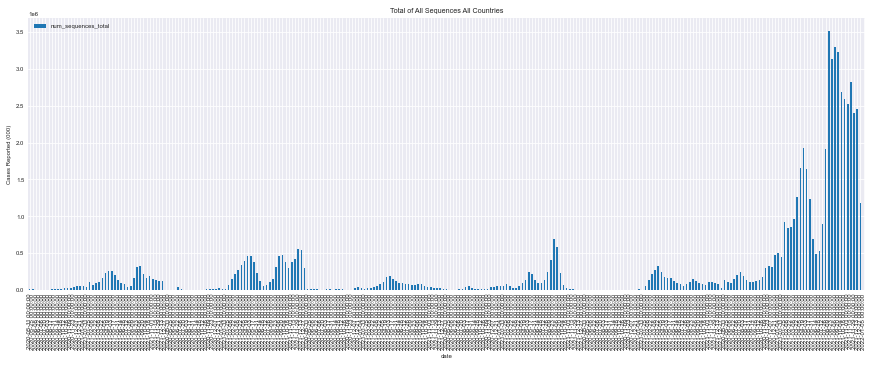

In [20]:
n=178
r = np.arange(n)
width = 0.25


# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=6)
plt.rc('lines', markersize=16) 
sum_all_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="bar", figsize=(15,5))
plt.title('Total of All Sequences All Countries')
plt.ylabel("Cases Reported (000)") 
#plt.xticks(r + width/4,['Canada','Germany','Sweden','United States'])
plt.legend()

Text(0, 0.5, 'Cases Reported (000)')

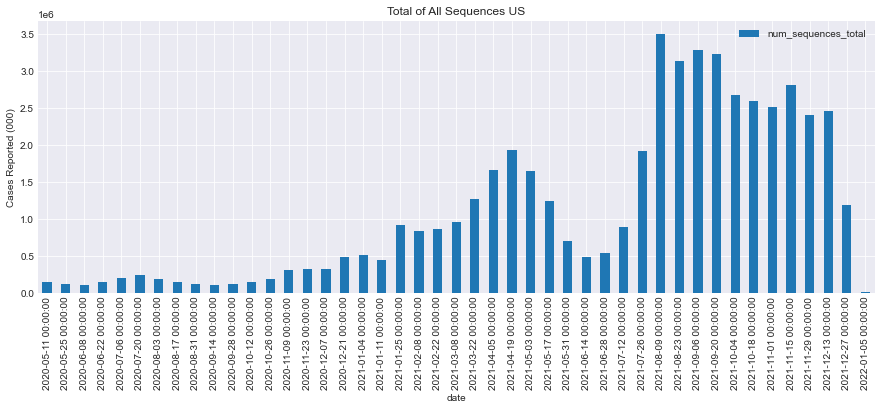

In [21]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_us_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="bar", figsize=(15,5))
plt.title('Total of All Sequences US')
plt.ylabel("Cases Reported (000)") 

Text(0, 0.5, 'Cases Reported ')

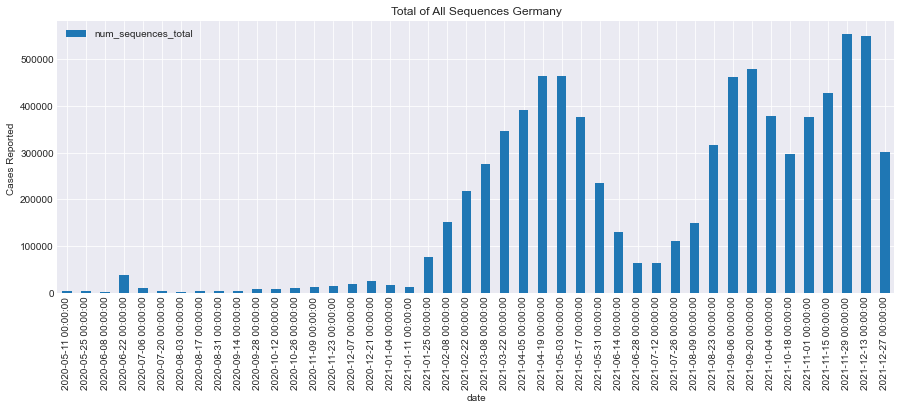

In [22]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_ger_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="bar", figsize=(15,5))
plt.title('Total of All Sequences Germany')
plt.ylabel("Cases Reported ") 

Text(0, 0.5, 'Cases Reported ')

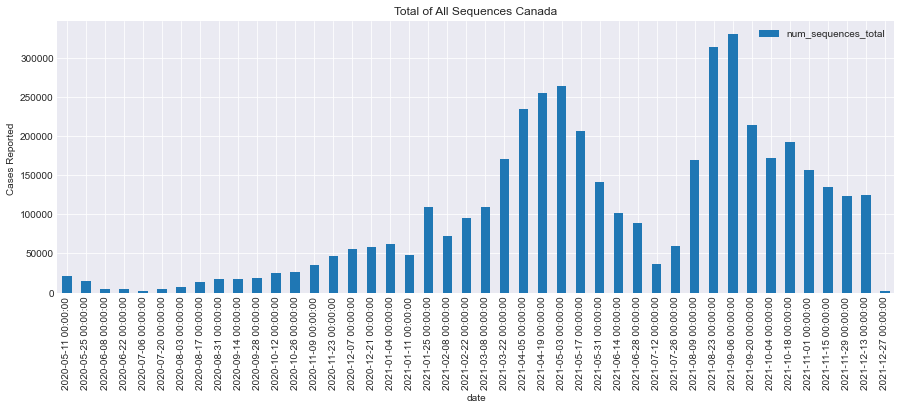

In [23]:
# Generate a bar plot showing the total number Covid Sequences Reported per time Period
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=10)
plt.rc('lines', markersize=16) 
sum_can_df.reset_index()[["date","num_sequences_total"]].set_index("date").plot(kind="bar", figsize=(15,5))
plt.title('Total of All Sequences Canada')
plt.ylabel("Cases Reported ") 

In [18]:
from datetime import datetime

sum_us_df.reset_index(inplace=True)

sum_us_df['date'] = pd.to_datetime(sum_us_df['date'])
sum_us_df.sort_values(by='date', ascending=True)



,location,date,num_sequences_total
0,United States,2020-05-11,139296
1,United States,2020-05-25,113664
2,United States,2020-06-08,96840
3,United States,2020-06-22,145680
4,United States,2020-07-06,200904
5,United States,2020-07-20,242928
6,United States,2020-08-03,187224
7,United States,2020-08-17,143808
8,United States,2020-08-31,117312
9,United States,2020-09-14,104688
